In [6]:
import os
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from data_collection import *
import numpy as npl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ensemble import * 
from sklearn.manifold import TSNE

In [7]:
##run PCA's on each variable
def make_PCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    X_pca = pca.transform(data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    return X_pca


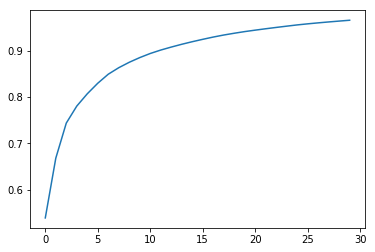

In [8]:
X1_pca = make_PCA(x1,30)

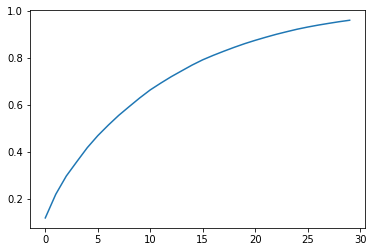

In [9]:
X4_pca = make_PCA(x4,30)

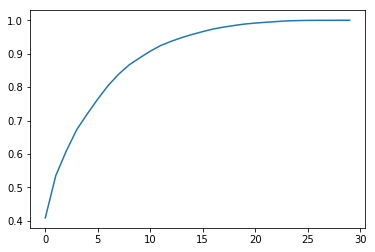

In [10]:
X5_pca = make_PCA(x5,30)

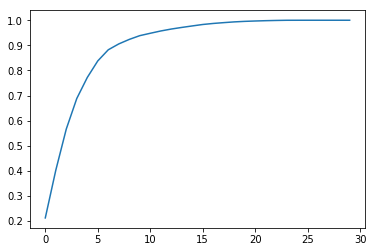

In [11]:
X6_pca = make_PCA(x6,30)

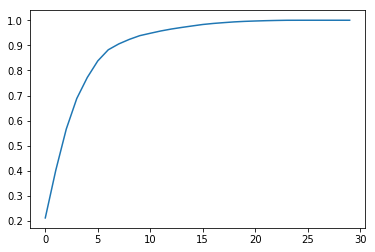

In [12]:
X7_pca = make_PCA(x7,30)

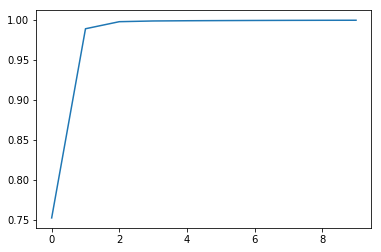

In [13]:
M_pca = make_PCA(master,10)

In [30]:
#put output k into buckets for coloring

# b = lambda x: -1 if x<2 else (0 if x<5 else (1 if x<10 else 2))
b = lambda x: -2 if x<2 else (-1 if x<4 else (0 if x<6 else (1 if x<10 else 2)))
buckets = np.array([b(xi) for xi in y])

In [31]:
def norm(data):
    new = data.copy()
    for i in range(data.shape[1]):
        var = data[:,i]
        h = var.max()
        l = var.min()
        new_var = new[:,i]
        for p in range(var.shape[0]):
            x = var[p]
            new_var[p] = (x-l)/(h-l)
        new[:,i]= new_var
    return new
            


In [32]:
def plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=buckets, marker='o',cmap="RdYlBu_r")
    X1_norm = norm(X1_pca)
    plt.show()
    plt.scatter(data[:, 0], data[:, 1], edgecolor='none', alpha= 1 , c=buckets,cmap="RdYlBu_r")
    
    plt.colorbar()

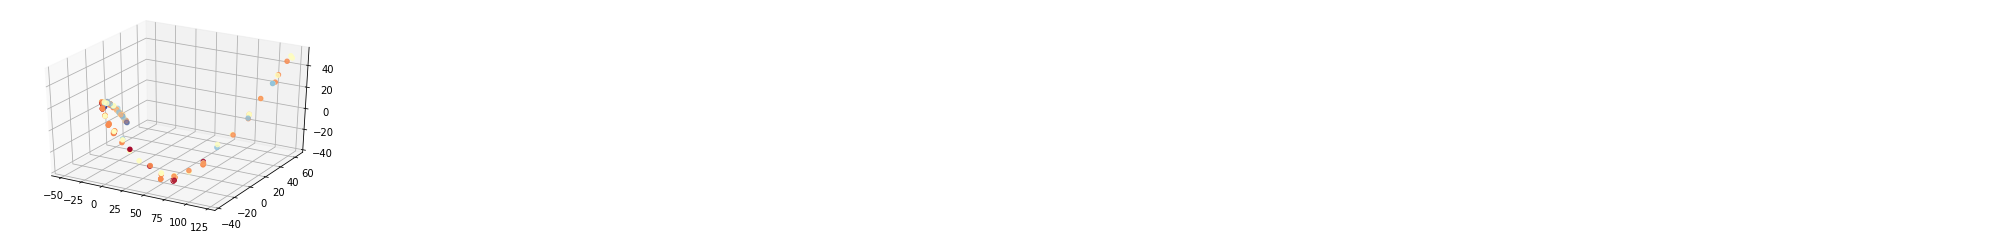

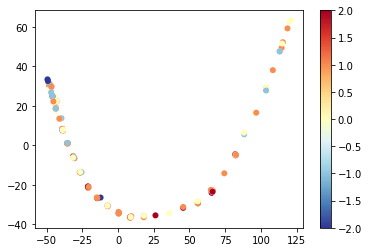

In [33]:
##Plot PCA in 2-d/ 3-d
plot(X1_pca)
X1_norm= norm(X1_pca)

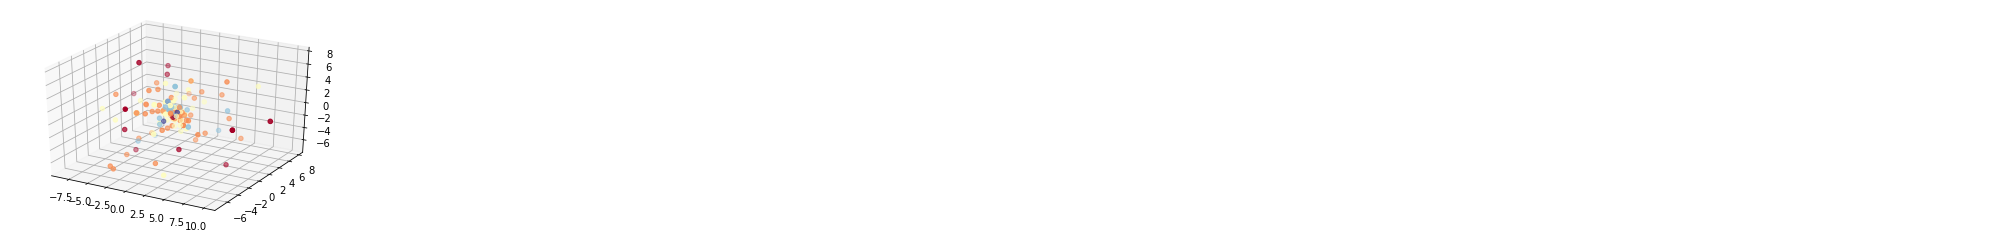

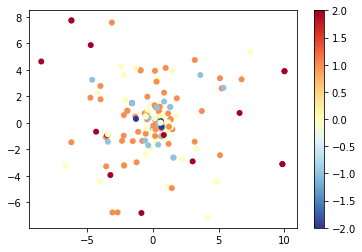

In [34]:
plot(X4_pca)
X4_norm = norm(X4_pca)

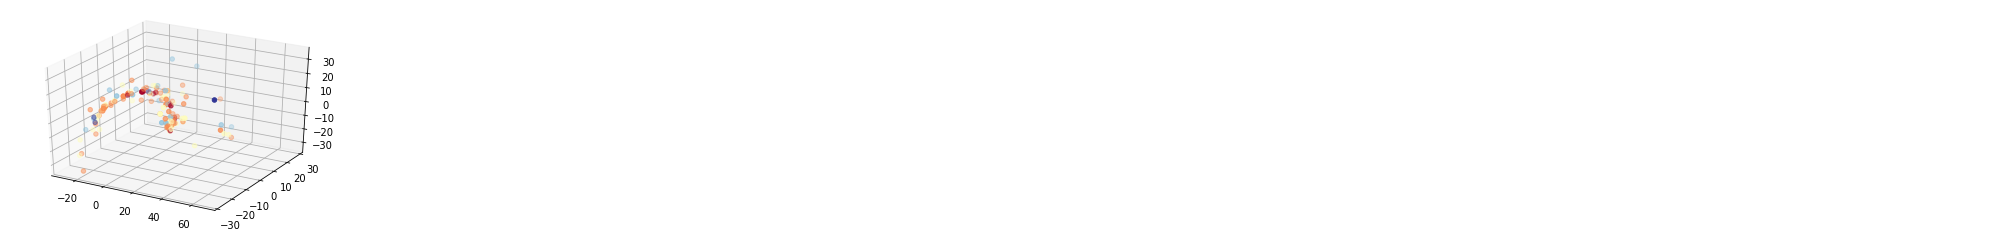

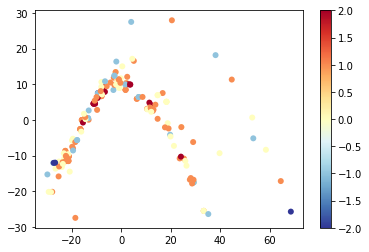

In [35]:
plot(X5_pca)
X5_norm = norm(X5_pca)

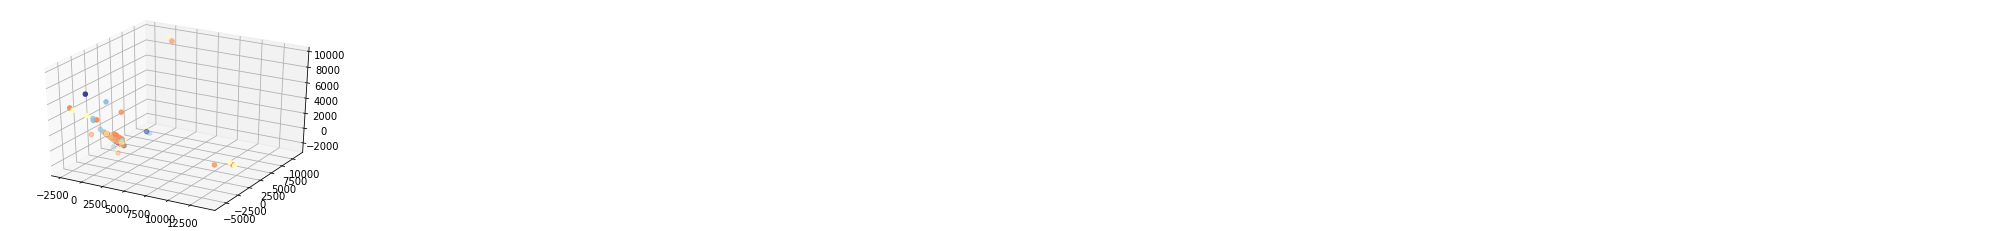

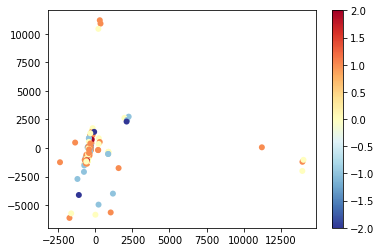

In [36]:
plot(X6_pca)
X6_norm = norm(X6_pca)

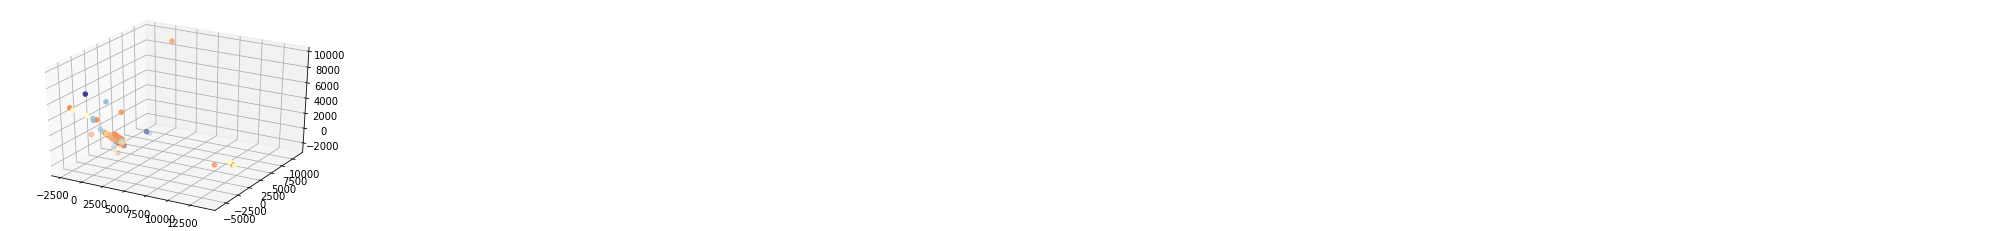

(191, 30)

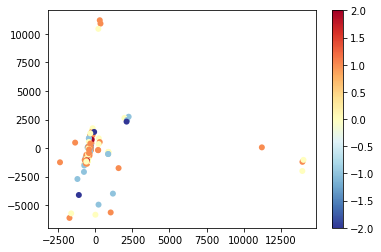

In [57]:
plot(X7_pca)
X7_norm = norm(X7_pca)


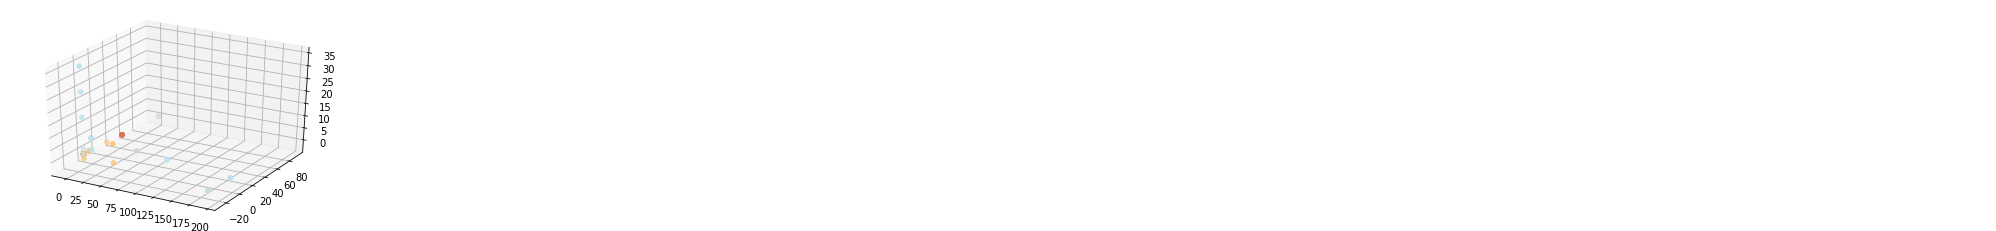

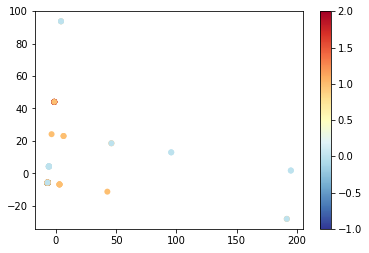

In [22]:
plot(M_pca)
M_norm = norm(M_pca)

In [23]:
def runTSNE(data, y, dims, perp, i):
    tsne = TSNE(perplexity=perp, n_iter=i)
    tsne_results = tsne.fit_transform(data[:,:dims])
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], edgecolor='none', alpha= .8 , c=buckets,cmap="RdYlBu_r")
    plt.colorbar()
    return tsne_results

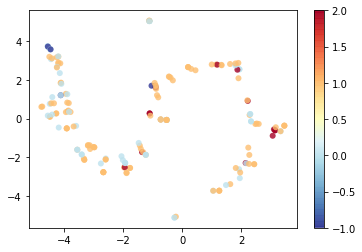

In [29]:
TSNE1 = runTSNE(X1_norm,buckets, 10,80,1000)

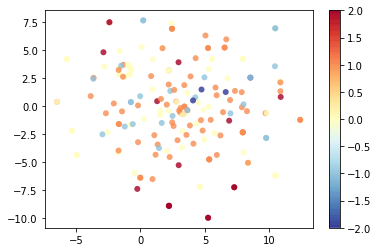

In [39]:
##No clear distinction
TSNE4 = runTSNE(X4_norm,buckets, 15,40,1000)

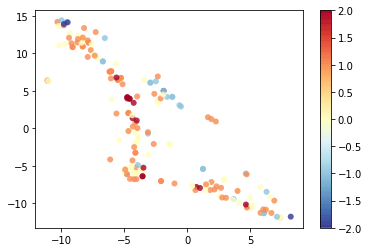

In [49]:
TSNE5 = runTSNE(X5_norm,buckets, 5,30,5000)

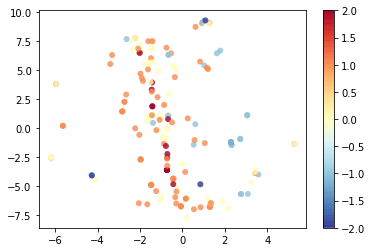

In [50]:
TSNE6 = runTSNE(X6_norm,buckets, 5,50,1000)

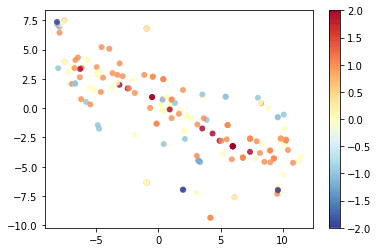

In [47]:
TSNE7 = runTSNE(X7_norm,buckets, 6,40,1000)

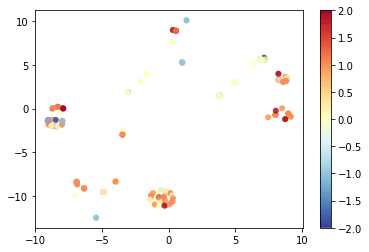

In [54]:
TSNEM = runTSNE(M_norm,buckets, 2,30,1000)

In [60]:
comb = np.concatenate((X1_norm,M_norm),1)

(191, 40)